In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
from scipy import stats
from scipy.stats import linregress
import json

In [2]:
crime_pd = pd.read_csv("City Data/2010-2019_Crime.csv")
# crime_pd.head()

In [3]:
# load community list
communities_csv = "City Data/Chicago_Communities.csv"
chicago_communities = pd.read_csv(communities_csv)
chicago_communities.head()

# Rename Columns with spaces
chicago_communities.rename(columns={'City Area': 'City_Area'}, inplace =True)
# chicago_communities

In [4]:
# Calclate the Grand Total # of Crimes and the % that the specified crime categories account for

grand_total = crime_pd["Crimes"].sum()
grand_total
violent_crimes = round(((crime_pd["Violent"].sum())/grand_total)*100).astype(str) + "%"
# violent_crimes
gun_crimes = round(((crime_pd["Gun_Violence"].sum())/grand_total)*100).astype(str) + "%"
# gun_crimes
robbery_crimes = round(((crime_pd["Robbery"].sum())/grand_total)*100).astype(str) + "%"
# robbery_crimes
vandalism_crimes = round(((crime_pd["Vandalism"].sum())/grand_total)*100).astype(str) + "%"
# vandalism_crimes
fraud_crimes = round(((crime_pd["Fraud"].sum())/grand_total)*100).astype(str) + "%"
fraud_crimes
drug_crimes = round(((crime_pd["Drug_Abuse"].sum())/grand_total)*100).astype(str) + "%"
drug_crimes
sex_crimes = round(((crime_pd["Sexual"].sum())/grand_total)*100).astype(str) + "%"
sex_crimes
crime_count_data = {'Total Reported Crimes': [grand_total],
                    'Total Violent Crimes':[violent_crimes],
                    'Total Vandalism Crimes':[vandalism_crimes],
                    'Total Drug Crimes': [drug_crimes],
                    'Total Robbery Crimes': [robbery_crimes],
                    'Total Fraudulent Crimes' : [fraud_crimes],
                    'Total Gun Violence Crimes': [gun_crimes],
                    'Total Sex Crimes': [sex_crimes]}

decade_crimes_df = pd.DataFrame(crime_count_data)

# Export DataFrame to CSV
decade_crimes_df.to_csv('decade_crime_count.csv')

decade_crimes_df

# These crime types account for ~55% of Chicago crimes.  
# Other crimes include non-violent theft, burglary, criminal trespassing, liquor violations, gambling, etc.

,Total Reported Crimes,Total Violent Crimes,Total Vandalism Crimes,Total Drug Crimes,Total Robbery Crimes,Total Fraudulent Crimes,Total Gun Violence Crimes,Total Sex Crimes
0,2966918,25.0%,10.0%,9.0%,4.0%,4.0%,3.0%,1.0%


In [5]:
# Create DataFrame to calculate annual crimes per year
crime_type_df = crime_pd.filter(['Year',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

# GroupBy Year
group_year = crime_type_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(group_year["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(group_year["Gun_Violence"].sum())
gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(group_year["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(group_year["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(group_year["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(group_year["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(group_year["Sexual"].sum())
# sexual_crimes

In [6]:
# Merge Crime Calculation DataFrames by year
merge_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
merge_table1

merge_table2 = pd.merge(merge_table1, robbery_crimes, on='Year')
merge_table2

merge_table3 = pd.merge(merge_table2, vandalism_crimes, on='Year')
merge_table3

merge_table4 = pd.merge(merge_table3, fraud_crimes, on='Year')
merge_table4

merge_table5 = pd.merge(merge_table4, drug_crimes, on='Year')
merge_table5

crime_type_totals = pd.merge(merge_table5, sexual_crimes, on='Year')
crime_type_totals = crime_type_totals.reset_index()
# crime_type_totals

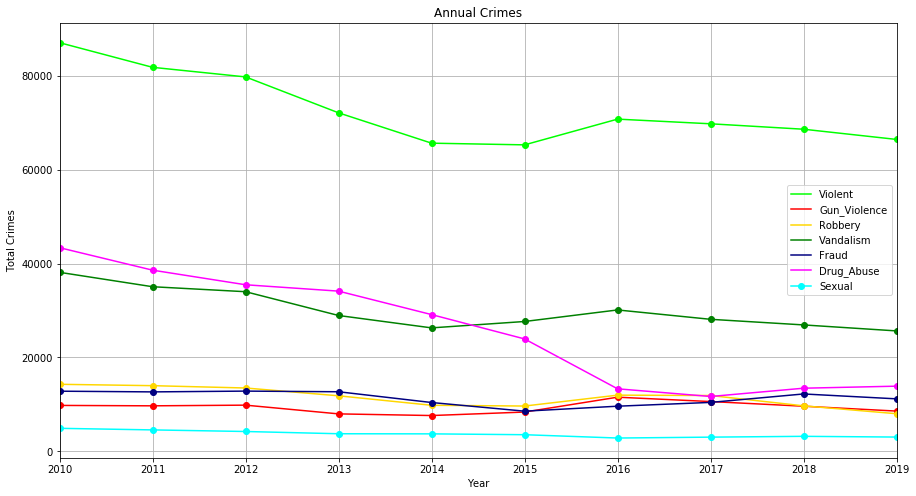

In [7]:
# Graph Crime Totals

ax = plt.gca()

crime_type_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('Pictures/grand_total_annual_crimes.png')

plt.show()

# 2013-2015 show a progressive decrease in crimes in almost all categories

In [8]:
# INPUT community name to create a modified line graph of annual community crimes
community = input("What part of Chicago do you want to look into?")

What part of Chicago do you want to look into? Austin


In [9]:
# Create a variable for city Areas and Neighborhoods
area = chicago_communities.loc[chicago_communities["Community"] == community]['City_Area']
# type(area)
area = area.values
area = area[0]
# area type was originally a series so ".values" was used to pull an individual value from that series

neighborhoods = chicago_communities.loc[chicago_communities["Community"]== community]['Neighborhood']
neighborhoods = neighborhoods.values
# Print neighborhoods without brackets and separated by commas
neighborhoods = (', '.join(neighborhoods))

# Use ".loc" to create a DataFrame adjusted based on the area
area_pcnt = crime_pd.loc[crime_pd["Area"]== area]
area_pcnt

# Calculate % of Grand Total Crimes in that area 2010-2019
grand_total = crime_pd["Crimes"].sum()
area_crime_pcnt = round(((area_pcnt["Crimes"].sum())/grand_total)*100).astype(str) + "%"
area_crime_pcnt
total_area_crimes = area_pcnt["Crimes"].sum()
total_area_crimes

# # Calculate % of Grand Total Crimes in that Community 2010-2019
# Use ".loc" to create a DataFrame adjusted based on the INPUT community
input_df = area_pcnt.loc[area_pcnt["Area"]== area]
area_pcnt



# # Provide the city area and list of neighborhoods in the input community
print(f"{community} is in the {area} area, including the following neighborhoods: {neighborhoods}. The {area} area accounts for ~{area_crime_pcnt} of City Crimes over the last decade, totaling {total_area_crimes} out of {grand_total}.")

Austin is in the West Side area, including the following neighborhoods: Galewood, The Island. The West Side area accounts for ~25.0% of City Crimes over the last decade, totaling 747097 out of 2966918.


In [10]:
# Create DataFrame to calculate annual crimes for the Area that the input Community is located 
area_crime_pd = crime_pd.filter(['Year',
                                 'Area',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

area_crime_pd

# Use ".loc" to create a DataFrame adjusted based on the INPUT community
input_df = area_crime_pd.loc[crime_pd["Area"]== area]
input_df

# GroupBy Year
year_group = input_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(year_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(year_group["Robbery"].sum())
# robbery_crimes
# # Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(year_group["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(year_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(year_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(year_group["Sexual"].sum())
# # sexual_crimes

In [11]:
# Merge Crime Calculation DataFrames by Year
m_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
m_table1

m_table2 = pd.merge(m_table1, robbery_crimes, on='Year')
m_table2

m_table3 = pd.merge(m_table2, vandalism_crimes, on='Year')
m_table3

m_table4 = pd.merge(m_table3, fraud_crimes, on='Year')
m_table4

m_table5 = pd.merge(m_table4, drug_crimes, on='Year')
m_table5

# Final Community DataFrame
area_crime_totals = pd.merge(m_table5, sexual_crimes, on='Year')
area_crime_totals = area_crime_totals.reset_index()
# area_crime_totals

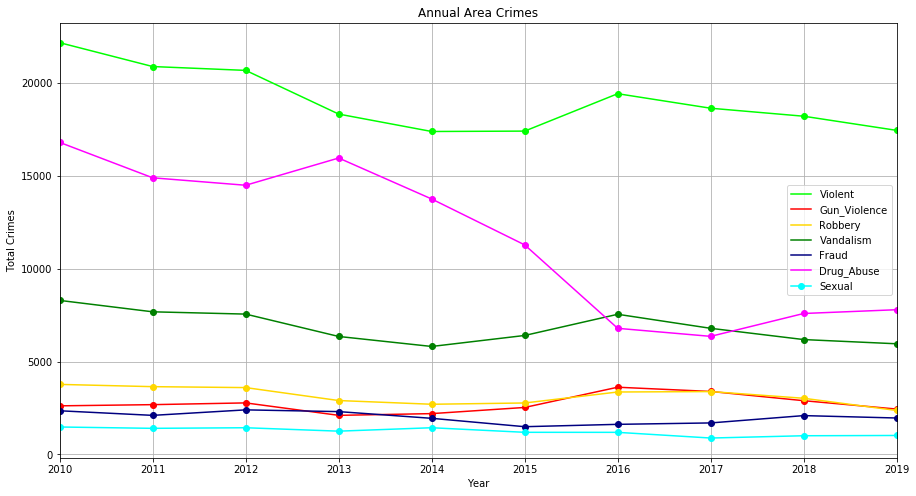

In [12]:
# Create a Line Graph of Input Community Areas

ax = plt.gca()

area_crime_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Area Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('Pictures/annual_community_crimes.png')

plt.show()

In [13]:
# Annual Gun Violence
# Top 9 communities with over 3,400 Gun Violence Crimes between 2010-2019
# All other Communities

# Filter Master DataFrame by Top 9 Communities
gun_violence_df = crime_pd[(crime_pd.Community == 'Austin')|
                        (crime_pd.Community == 'North Lawndale')|
                        (crime_pd.Community == 'South Shore')|
                        (crime_pd.Community == 'West Englewood')|
                        (crime_pd.Community == 'Roseland')|
                        (crime_pd.Community == 'Auburn Gresham')|
                        (crime_pd.Community == 'Greater Grand Crossing')|
                        (crime_pd.Community == 'Englewood')|
                        (crime_pd.Community == 'Humboldt Park')]
# gun_violence_df

# Filter Relevant Columns
gun_violence_df = gun_violence_df.filter(["Year", "Community", "Gun_Violence"])
# gun_violence_df

# Group by Year and Community
comm_year_group = gun_violence_df.groupby(["Year","Community"])

# Calculate Gun Violence per Year by Community
gun_violence_df = pd.DataFrame(comm_year_group["Gun_Violence"].sum())
# gun_violence_df

# Pivot Table to reformat the DataFrame
gun_violence_df = gun_violence_df.pivot_table(index= 'Year', columns = 'Community', values = 'Gun_Violence')
gun_violence_df= gun_violence_df.reset_index()
# gun_violence_df

# Rename Columns with spaces
gun_violence_df.rename(columns={'North Lawndale': 'North_Lawndale',
                                'South Shore': 'South_Shore',
                                'West Englewood': 'West_Englewood',
                                'Auburn Gresham': 'Auburn_Gresham',
                                'Greater Grand Crossing': 'Greater_Grand_Crossing',
                                'Humboldt Park': 'Humboldt_Park'}, inplace =True)
# gun_violence_df

#These neighborhoods account for 40% of total gun violence crimes over the last decade.  Austin is significantly
# higher than all other communities, individually totaling nearly 9% of gun violence crimes.  All remaing 
# communities are 4% or less.


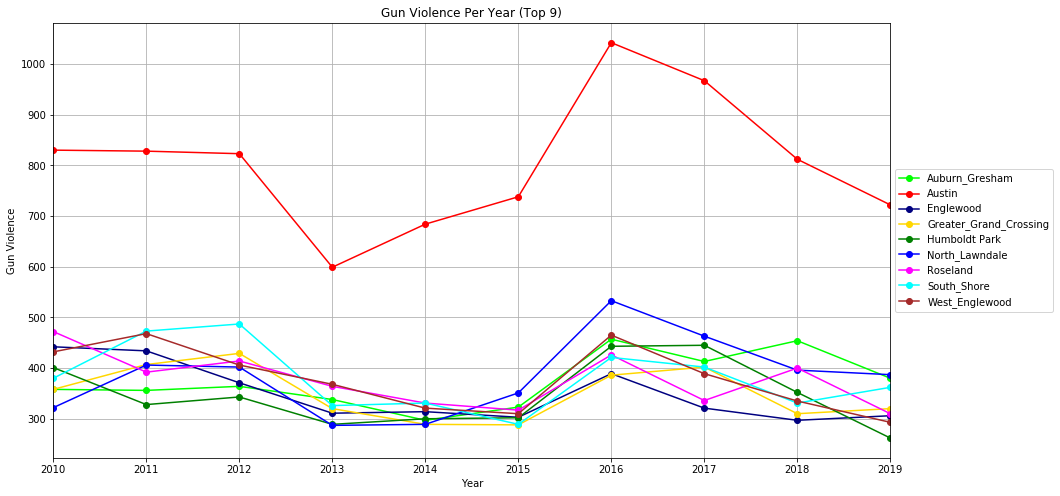

In [14]:
# Build Gun Violence Line Graph

# gca stands for 'get current axis'
ax = plt.gca()

gun_violence_df.plot(kind='line',x='Year',y='Auburn_Gresham',marker ='o',color='lime',figsize=(15,8),ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Austin', marker ='o',color='red', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Englewood',marker ='o', color = 'navy', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Greater_Grand_Crossing',marker ='o', color = 'gold', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Humboldt_Park',marker ='o', color = 'green', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='North_Lawndale',marker ='o', color = 'blue', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Roseland',marker ='o', color = 'magenta', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='South_Shore',marker ='o', color = 'aqua', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='West_Englewood',marker ='o', color = 'brown', ax=ax)

# Add title, labels legend & grid lines
plt.title("Gun Violence Per Year (Top 9)")
plt.xlabel("Year")
plt.ylabel("Gun Violence")

# Legend Names & Relocate outside of graph
plt.legend(["Auburn_Gresham",
            "Austin", 
            "Englewood", 
            "Greater_Grand_Crossing", 
            "Humboldt Park",
            "North_Lawndale",
            "Roseland",
            "South_Shore",
            "West_Englewood"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)

# Save the Figure
plt.savefig('Pictures/annual_gun_violence.png')

plt.show()

In [15]:
# Violent Crimes vs # of Arrests

# Build DataFrame
arrest_df = crime_pd.filter(['Year','Violent','Arrests'])
arrest_df

# Exclude rows that are >1 under the 'Violent' column
arrest_df = arrest_df.query('Violent > 0')
arrest_df

# GroupBy Year
year_group = arrest_df.groupby(["Year"])

# Calculate Violent Crimes per Year
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
violent_crimes

#Calculate # of Arrests per year
arrests = pd.DataFrame(year_group["Arrests"].sum())
arrests

# Merge Violent_Crimes and Arrests DataFrames
arrest_pcnt = pd.merge(violent_crimes, arrests, on = 'Year')
arrest_pcnt ['Arrest_Pcnt'] = round((arrest_pcnt['Arrests']/arrest_pcnt['Violent'])*100,0)
arrest_pcnt['No_Arrests_Pcnt'] = round(((arrest_pcnt['Violent'] - arrest_pcnt['Arrests'])/arrest_pcnt['Violent'])*100,0) 
arrest_pcnt = arrest_pcnt.reset_index()
arrest_pcnt.to_csv('arrest_pcnt.csv')
# arrest_pcnt

In [16]:
# Merge Violent_Crimes and Arrests DataFrames
v_crime_arrests = pd.merge(violent_crimes, arrests, on = 'Year')
v_crime_arrests

v_crime_arrests['No_Arrests'] = v_crime_arrests['Violent'] - v_crime_arrests['Arrests']
v_crime_arrests = v_crime_arrests.reset_index()
v_crime_arrests = v_crime_arrests.filter(["Year", "Arrests", "No_Arrests"])
# v_crime_arrests

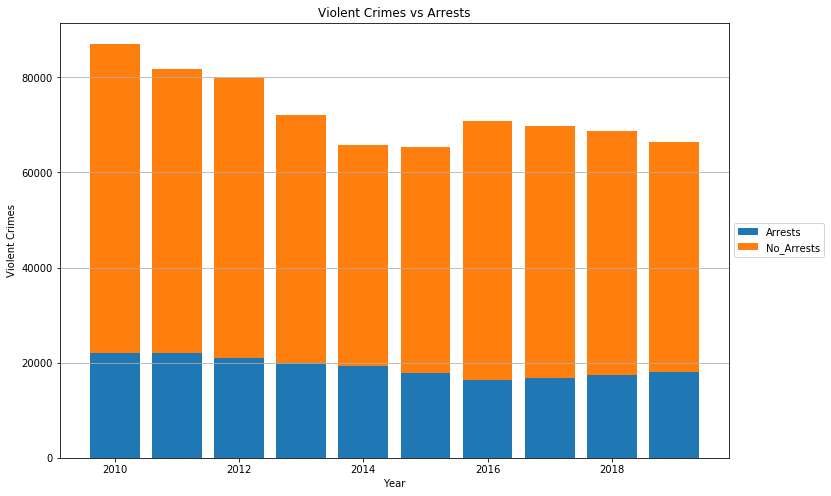

In [17]:
# Stack Bar Chart Violent Crimes vs Arrests
cumval=0
fig = plt.figure(figsize=(12,8))
for col in v_crime_arrests.columns[~v_crime_arrests.columns.isin(['Year'])]:
    plt.bar(v_crime_arrests.Year, v_crime_arrests[col], bottom=cumval, label=col)
    cumval = cumval+v_crime_arrests[col]

# Add title, labels legend & grid lines
plt.title("Violent Crimes vs Arrests")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")

# Legend Names & Relocate outside of graph
plt.legend(["Arrests",
            "No_Arrests"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(axis='y')

# Save the Figure
plt.savefig('Pictures/v_crime_arrests.png')

plt.show()

In [18]:
# Calculate areas with the highest types of crimes

area_crimes_df = crime_pd.filter(['Area',
                                 'Violent',
                                 'Gun_Violence',
                                 'Weapon',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])
area_crimes_df

# GroupBy Area
area_group = area_crimes_df.groupby(['Area'])

# Calculate Violent Crimes
v_crimes = pd.DataFrame(area_group["Violent"].sum())
v_crimes
# Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(area_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(area_group["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(area_group["Vandalism"].sum())
# vandalism_crimes
# Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(area_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(area_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sex_crimes = pd.DataFrame(area_group["Sexual"].sum())
# sexual_crimes

# area_crimes_df


In [19]:
# Merge Crime Calculations
table1 = pd.merge(v_crimes, gun_crimes, on='Area')
table1

table2 = pd.merge(table1, robbery_crimes, on='Area')
table2

table3 = pd.merge(table2, vandalism_crimes, on='Area')
table3

table4 = pd.merge(table3, fraud_crimes, on='Area')
table4

table5 = pd.merge(table4, drug_crimes, on='Area')
table5

crimes_per_area = pd.merge(table5, sex_crimes, on='Area')
crimes_per_area= crimes_per_area.reset_index()
crimes_per_area.to_csv('area_crimes.csv')
# crimes_per_area

In [20]:
# Highlight Areas with the Max Amount of Crimes per Type

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [21]:
crimes_per_area.style.apply(highlight_max)

,Area,Violent,Gun_Violence,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual
0,Central,32227,1697,6109,10566,22247,4624,1829
1,Far North Side,54681,4118,7447,27349,13793,14048,2583
2,Far Southeast Side,98273,14909,14294,40577,9305,25881,3739
3,Far Southwest Side,48212,7307,7465,21439,5640,13983,1661
4,North Side,37110,3369,7417,21076,12106,5515,1568
5,Northwest Side,38236,3616,4763,20049,6810,8706,2059
6,Southside,112137,15147,18282,43213,10841,29031,3907
7,Southwest Side,116088,16075,17193,48077,12569,39481,6992
8,West Side,190541,27263,31542,68579,19981,115699,12319


In [22]:
# Filter Community list by West Side and Central Areas to Identify Communities and Areas in those Areas

max_crime_locations = chicago_communities[(chicago_communities.City_Area == 'West Side')|
                        (chicago_communities.City_Area == 'Central')]
# max_crime_locations               

In [23]:
# Filter on homicides and drop unneccesary rows
homicides_df = crime_pd.loc[crime_pd["Primary Type"] == "HOMICIDE"]
homicides_df = homicides_df[["Year", "Months", "Primary Type", "Community", "Crimes"]]
# homicides_df

In [24]:
print("There were 2927 homicides in Chicago in the 2010s.")

There were 2927 homicides in Chicago in the 2010s.


In [25]:
# Groupby Year
homicides_by_year = homicides_df.groupby('Year').sum()
homicides_by_year.reset_index(level=0, inplace = True)
homicides_by_year

,Year,Crimes
0,2010,438
1,2011,438
2,2012,515
3,2013,429
4,2014,426
5,2015,502
6,2016,788
7,2017,674
8,2018,592
9,2019,503


In [26]:
# Create Variables
year = homicides_by_year.iloc[:,0]
homicides = homicides_by_year.iloc[:,1]

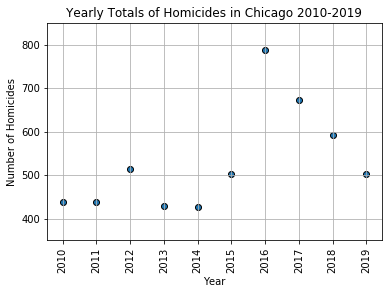

In [27]:
# Create a Scatter Plot for year vs. homicide totals
plt.scatter(year, homicides, marker="o", edgecolors="black")

# Graph Properties
plt.title("Yearly Totals of Homicides in Chicago 2010-2019")
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(year, rotation=90)

# y range
plt.ylim(350, 850)

# Save the figure
plt.savefig('Pictures/Yearly Homicide Totals.png')

# Show Plot
plt.show()

In [28]:
# Perform a linear regression on year versus homicides
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(year, homicides)

In [29]:
# equation for line for predicted homicide rate
fit = slope * year + intercept

In [30]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 21.88x +-43556.53


The r-squared is: 0.5495737448360712


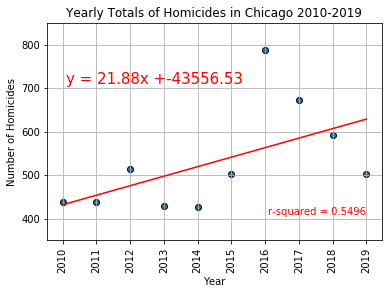

In [31]:
#### Add fit line to scatter
plt.scatter(year, homicides, marker="o", edgecolors="black")

# Graph Properties
plt.title("Yearly Totals of Homicides in Chicago 2010-2019")
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(year, rotation=90)

# add fit line
plt.plot(year,fit,"r-")

# y range
plt.ylim(350, 850)

# add fit line equation
plt.annotate(line_eq,(2010.1,710),fontsize=15,color="red")

# add r-squared
plt.annotate(f"r-squared = {round(rvalue,4)}",(2016.1,410),fontsize=10,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Pictures/2010-2019 Regression.png")

# Show Plot
plt.show()

In [32]:
# Adding 2020 as "x":

y = 21.88 * 2020 - 43556.53
print(f"This model predicts {round(y)} homicides in Chicago in 2020.")

This model predicts 641 homicides in Chicago in 2020.


In [33]:
# Why is this a poor model? 
# Nationwide crime spike in 2016. 
# New policing tactics since 2016.

In [34]:
# New Dataframe just on 2016-2019

homicides_2016_on = homicides_by_year.iloc[6:10, :]
homicides_2016_on

,Year,Crimes
6,2016,788
7,2017,674
8,2018,592
9,2019,503


In [35]:
# Create Variables
year_post_2016 = homicides_2016_on.iloc[:,0]
homicides_post_2016 = homicides_2016_on.iloc[:,1]

In [36]:
# Perform a linear regression on year versus homicides
(slope_2016, intercept_2016, rvalue_2016, pvalue_2016, stderr_2016) = stats.linregress(year_post_2016, homicides_post_2016)

In [37]:
# equation for line for predicted homicide rate
fit_post_2016 = slope_2016 * year_post_2016 + intercept_2016

In [38]:
# Create line equation string
line_eq_post_2016 = "y = " + str(round(slope_2016,2)) + "x +" + str(round(intercept_2016,2))

The r-squared is: -0.997364575625488


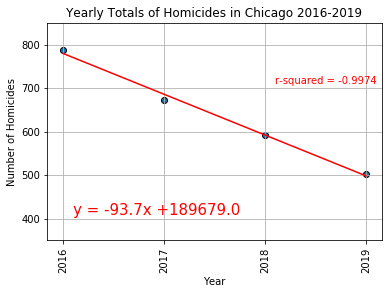

In [39]:
# Scatter plot with fit line
plt.scatter(year_post_2016, homicides_post_2016, marker="o", edgecolors="black")

# Graph Properties
plt.title("Yearly Totals of Homicides in Chicago 2016-2019")
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(year_post_2016, rotation=90)

# add fit line
plt.plot(year_post_2016,fit_post_2016,"r-")

# add fit line equation
plt.annotate(line_eq_post_2016,(2016.1,410),fontsize=15,color="red")

# y range
plt.ylim(350, 850)

# Print r square value
print(f"The r-squared is: {rvalue_2016}")

# add r-squared
plt.annotate(f"r-squared = {round(rvalue_2016,4)}",(2018.1,710),fontsize=10,color="red")

# Save the figure
plt.savefig("Pictures/2016-2019 Regression.png")

# Show Plot
plt.show()

In [40]:
# Adding 2020 as "x":

y = -93.7 * 2020 + 189679.0
print(f"This model predicts {round(y)} homicides in Chicago in 2020.")

This model predicts 405 homicides in Chicago in 2020.


In [41]:
# load community list
communities_csv = "City Data/Chicago_Communities.csv"
chicago_communities = pd.read_csv(communities_csv)
chicago_communities.head()

,Community #,City Area,Community,Neighborhood
0,8,Central,Near North Side,Cabrini-Green
1,8,Central,Near North Side,The Gold Coast
2,8,Central,Near North Side,Goose Island
3,8,Central,Near North Side,Magnificent Mile
4,8,Central,Near North Side,Old Town


In [42]:
# Merge crime and community data
merge_data = pd.merge(crime_pd, chicago_communities, on="Community")
merge_data.head()

,Community #_x,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,...,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual,Lat,Lng,Community #_y,City Area,Neighborhood
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,Loop
1,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,New Eastside
2,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,South Loop
3,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,West Loop Gate
4,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,...,0,0,0,0,0,41.880831,-87.629159,32,Central,Loop


In [43]:
merge_data=merge_data.rename(columns={"Community #_x": "Community #"})
merge_data.head()

,Community #,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,...,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual,Lat,Lng,Community #_y,City Area,Neighborhood
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,Loop
1,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,New Eastside
2,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,South Loop
3,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,West Loop Gate
4,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,...,0,0,0,0,0,41.880831,-87.629159,32,Central,Loop


In [44]:
# Taking advantage of the City of Chicago's data portal, we found an interesting metric to compare against homicide numbers:
# the rate of adults over 25 without a high school diploma per neighborhood.

In [45]:
# load social metrics by community area spreadsheet
per_capita_income="Per_Capita_Income 2008-2012.csv"
edu_data=pd.read_csv(per_capita_income)
edu_data_renamed=edu_data.rename(columns={"Community Area Number": "Community #"})
edu_data.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [46]:
# Merge crime and social data
complete_data = pd.merge(merge_data, edu_data_renamed, on="Community #")
complete_data.head()

,Community #,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,...,City Area,Neighborhood,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
1,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,New Eastside,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
2,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,South Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
3,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,West Loop Gate,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
4,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,...,Central,Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0


In [47]:
complete_data["Community"].value_counts()

Near North Side    19416
West Town          16310
Near West Side     14436
Irving Park        14217
Lakeview           10690
                   ...  
Oakland             1451
Hegewisch           1421
Montclare           1384
Burnside            1319
Edison Park          987
Name: Community, Length: 77, dtype: int64

In [48]:
complete_filter_by_commun=complete_data.loc[(complete_data["Community"]=="Loop") | 
                       (complete_data["Community"]=="Rogers Park") | 
                       (complete_data["Community"]=="South Chicago")| 
                       (complete_data["Community"]=="Morgan Park")|
                       (complete_data["Community"]=="Logan Square")|
                       (complete_data["Community"]=="Portage Park")|
                       (complete_data["Community"]=="Hyde Park")|
                       (complete_data["Community"]=="Englewood")|
                       (complete_data["Community"]=="Humboldt Park")]
# complete_filter_by_commun

In [49]:
# Filter on homicides and drop unneccesary rows and columns
homicides_df = complete_filter_by_commun.loc[(complete_filter_by_commun["Primary Type"] == "HOMICIDE")]
homicides_df = homicides_df[["Year","Primary Type", "COMMUNITY AREA NAME","PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"]]
homicides_df

,Year,Primary Type,COMMUNITY AREA NAME,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
304,2010,HOMICIDE,Loop,3.1
305,2010,HOMICIDE,Loop,3.1
306,2010,HOMICIDE,Loop,3.1
307,2010,HOMICIDE,Loop,3.1
1152,2011,HOMICIDE,Loop,3.1
...,...,...,...,...
328311,2019,HOMICIDE,Humboldt park,35.4
328333,2019,HOMICIDE,Humboldt park,35.4
328355,2019,HOMICIDE,Humboldt park,35.4
328376,2019,HOMICIDE,Humboldt park,35.4


In [50]:
# Filter for 2010, this is a period we have data for 
homicides_2010_df = homicides_df[homicides_df.Year == 2010]
homicides_2010_df

,Year,Primary Type,COMMUNITY AREA NAME,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
304,2010,HOMICIDE,Loop,3.1
305,2010,HOMICIDE,Loop,3.1
306,2010,HOMICIDE,Loop,3.1
307,2010,HOMICIDE,Loop,3.1
79168,2010,HOMICIDE,Rogers Park,18.2
...,...,...,...,...
325982,2010,HOMICIDE,Humboldt park,35.4
326004,2010,HOMICIDE,Humboldt park,35.4
326045,2010,HOMICIDE,Humboldt park,35.4
326068,2010,HOMICIDE,Humboldt park,35.4


In [51]:
# format new df
df = pd.DataFrame(homicides_2010_df['COMMUNITY AREA NAME'].value_counts())
df = df.reset_index()
df.columns = ['COMMUNITY AREA NAME','HOMICIDE COUNT']
df


,COMMUNITY AREA NAME,HOMICIDE COUNT
0,Morgan Park,18
1,Humboldt park,11
2,South Chicago,8
3,Logan Square,8
4,Portage Park,6
5,Englewood,6
6,Loop,4
7,Rogers Park,3
8,Hyde Park,2


In [52]:
# merging
df = homicides_2010_df.merge(df,how="inner",on='COMMUNITY AREA NAME')

In [53]:
# comparing homicide numbers to adult education numbers
df = df.groupby('COMMUNITY AREA NAME')[['HOMICIDE COUNT','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']].max()
df

,HOMICIDE COUNT,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
COMMUNITY AREA NAME,,
Englewood,6,28.5
Humboldt park,11,35.4
Hyde Park,2,4.3
Logan Square,8,14.8
Loop,4,3.1
Morgan Park,18,10.8
Portage Park,6,19.3
Rogers Park,3,18.2
South Chicago,8,26.6


In [54]:
# Let's see how our chosen neighborhoods compare to each other in number of homicides.

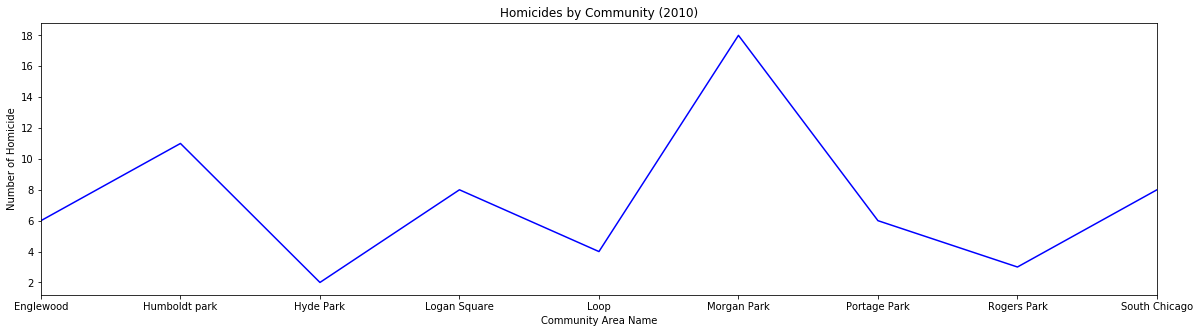

In [55]:
# Homicide & Community Graph
plt.figure(figsize=(20,5))
df['HOMICIDE COUNT'].plot(color='b')
plt.title("Homicides by Community (2010)")
plt.xlabel('Community Area Name')
plt.ylabel('Number of Homicide')

# Save the figure
plt.savefig("Pictures/Homicides By Community.png")

In [56]:
# Taking advantage of the City of Chicago's data portal, we found an interesting metric to compare against homicide numbers:
# the rate of adults over 25 without a high school diploma per neighborhood.

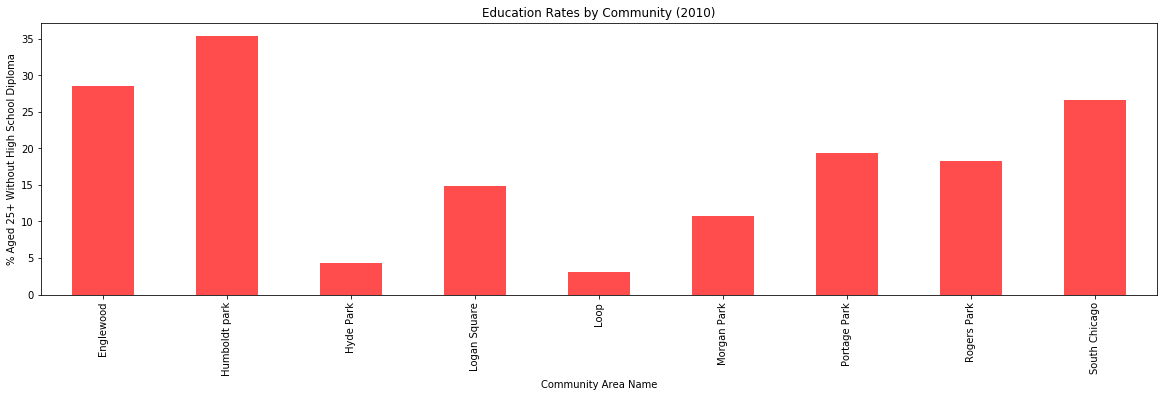

In [57]:
# Education & Community Graph
plt.figure(figsize=(20,5))
df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar', color='r', alpha=0.7, align="center")
plt.title("Education Rates by Community (2010)")
plt.xlabel('Community Area Name')
plt.ylabel('% Aged 25+ Without High School Diploma')

# Save the figure
plt.savefig("Pictures/Education by Community.png")

In [58]:
#This metric interacts with neighborhood investment, employment rate, and, as we'll see, crime rates.

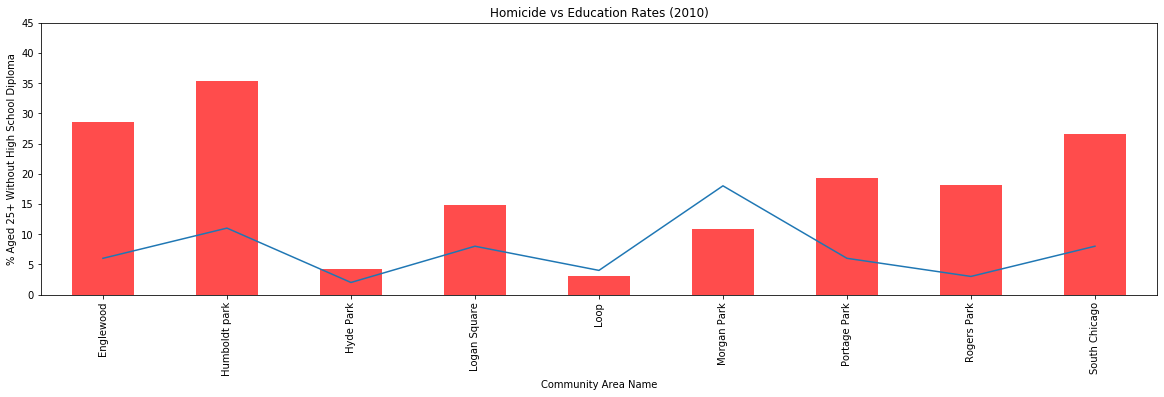

In [59]:
# Homicide on Education Graph
plt.figure(figsize=(20,5))
df['HOMICIDE COUNT'].plot()
df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar',color='r', alpha=0.7, align="center")
plt.title("Homicide vs Education Rates (2010)")
plt.xlabel('Community Area Name')
plt.ylabel('% Aged 25+ Without High School Diploma')
plt.ylim(0, 45)

# Save the figure
plt.savefig("Pictures/Homicide vs Education.png")

plt.show()

In [60]:
# Create Variables
homicides_on_ed = df.iloc[:,0]
ed_rates = df.iloc[:,1]

In [61]:
# Perform a linear regression on year versus homicides
(slope_ed, intercept_ed, rvalue_ed, pvalue_ed, stderr_ed) = stats.linregress(ed_rates, homicides_on_ed)

In [62]:
# equation for line for predicted homicide rate
fit_ed = slope_ed * ed_rates + intercept_ed

In [63]:
# Create line equation string
line_eq_ed = "y = " + str(round(slope_ed,2)) + "x +" + str(round(intercept_ed,2))

The r-squared is: 0.22645416439161206


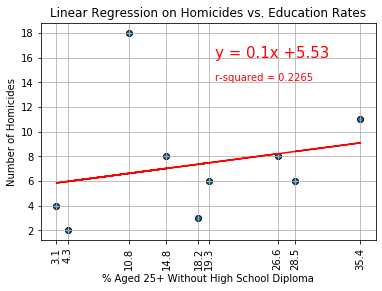

In [64]:
# Create a Scatter Plot for year vs. homicide totals
plt.scatter(ed_rates, homicides_on_ed, marker="o", edgecolors="black")

# Graph Properties
plt.title("Linear Regression on Homicides vs. Education Rates")
plt.xlabel('% Aged 25+ Without High School Diploma')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(ed_rates, rotation=90)

# add fit line
plt.plot(ed_rates,fit_ed,"r-")

# add fit line equation
plt.annotate(line_eq_ed,(20,16),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue_ed}")

# add r-squared
plt.annotate(f"r-squared = {round(rvalue_ed,4)}",(20,14.1),fontsize=10,color="red")

# Save the figure
plt.savefig("Pictures/Homicide - Education Regression.png")

# Show Plot
plt.show()

In [65]:
# load community list
communities_csv = "City Data/Chicago_Communities.csv"
chicago_communities = pd.read_csv(communities_csv)
chicago_communities.head()

,Community #,City Area,Community,Neighborhood
0,8,Central,Near North Side,Cabrini-Green
1,8,Central,Near North Side,The Gold Coast
2,8,Central,Near North Side,Goose Island
3,8,Central,Near North Side,Magnificent Mile
4,8,Central,Near North Side,Old Town
